# Auto_VTNA tutorial

This Jupyter Notebook aims to show how to use the auto_vtna package in Jupyter Notebook or other Python interpreters such as VS code. Note, however, that it is recommended to rather use the Automatic VTNA Calculator GUI for most applications, as it provides a more intuitive and efficient user experience. 

## Setup: Installing Dependencies

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functools import partial
import logging
logging.getLogger('matplotlib.font_manager').disabled = True

In [31]:
%matplotlib inline

## Import auto_vtna and the Normal_VTNA and Automatic_VTNA classes from the auto_vtna package

In [2]:
import auto_vtna

In [3]:
from auto_vtna.Normal_VTNA import Normal_VTNA

In [4]:
from auto_vtna.Automatic_VTNA import Automatic_VTNA

Note that currently, there are some minor issues with using auto_vtna in Jupyter Notebook:
- when plotting kinetic data with auto_vtna.plot_data() or auto_vtna.plot_data_MB(), the scrollable mode is not interactive, which means that it is frozen at the first experiment. This issue does not arise usin the GUI or in VS code. 
- When using the plot_VTNA_with_overlay_score() method of the Normal_VTNA class, the legend cannot be set to outside (legend_outside=True) with %matplotlib inline as the legend will not be shown. However, using %matplotlib qt solves this issue. 

## Import the simulated kinetic data from Excel

Auto-VTNA requires that the kinetic data is formatted as a dictionary containing one pandas dataframe for each experiment. The Pandas dataframes should contain a time column followed by concentration columns for a given number of reaction species such as reactants, additives, catalysts or products. 
The easiest way to create the kinetic data variable is to set up an xlsx. (Excel) file containing kinetic data for experiments in separate sheets. For instance, take a look at the simulated kinetic datasets in "simulated_data_catalyst_order.xlsx" or "data_A+B+cat_to_P+cat.xlsx", in the same "tutorial" folder as this .pynb file. Such .xlsx files can be uploaded in the correct format using "pd.read_excel()" with sheet_name set to None to save the sheet names of the .xlsx file. 

In [39]:
simulated_kinetic_data_1=pd.read_excel('Simulated_data_catalyst_order.xlsx',sheet_name=None)
simulated_kinetic_data_2=pd.read_excel('data_A+B+cat_to_P+cat.xlsx',sheet_name=None)

The simulated kinetic data in data_A+B+cat_to_P+cat.xlsx was generated in Berkeley madona with the following simple kinetic model, with different intial concentrations and final time points:

A + B + cat -> P + cat  (k=20, RK4 ODE solver).

The data point density of concentration profiles from each simulated experiment were then reduced in Python. The simulated kinetic data in 'Simulated_data_catalyst_order.xlsx' has been obtained from the ESI of the following pre-print: https://onlinelibrary.wiley.com/doi/abs/10.1002/anie.201609757

## Checking if the kinetic data has been loaded correctly

If the kinetic data variable is not configured correctly, auto_vtna will give errors. To check whether the kinetic data variable has been configured correctly, the check_data() function in auto_vtna can be used. Check_data() test several criteria and provide a report to inform you about possible issues such as negative numbers, non-numerical values or mismatching column titles. 

In [6]:
Check_1=auto_vtna.check_kinetic_data(simulated_kinetic_data_1)

Kinetic data check report.
--------------------------
Check 1: Correct loading of kinetic data from Excel.
  ✓ The kinetic data is loaded as a dictionary.
  ✓ Each element associated a key in the kinetic data dictionary is a pandas dataframe object.
  ✓ The dataframe element(s) in the kinetic data dictionary all contain 5 columns.
Check 2: Column title consistency.
  ✓ All experiment datasets have the same column titles.
Check 3: Numerical datapoints. 
  ✓ Every experiment dataset contains only numericalvalues.
Check 4: Positive datapoints. 
  ✓ No datasets contain negative time or concentration values.
Check 5: Time column monotonicity.
  ✓ The time column (first column) of the dataset in every sheet is monotonically increasing.
Check 6: Time and concentration columns. 
  ✓ All dataframe elements in the kinetic data dictionary has column titles which are strings.
  ✓ The column titles of every experiment dataset are all strings.
NB: Make sure that the time columns are the first column

In [7]:
Check_2=auto_vtna.check_kinetic_data(simulated_kinetic_data_2)

Kinetic data check report.
--------------------------
Check 1: Correct loading of kinetic data from Excel.
  ✓ The kinetic data is loaded as a dictionary.
  ✓ Each element associated a key in the kinetic data dictionary is a pandas dataframe object.
  ✓ The dataframe element(s) in the kinetic data dictionary all contain 5 columns.
Check 2: Column title consistency.
  ✓ All experiment datasets have the same column titles.
Check 3: Numerical datapoints. 
  ✓ Every experiment dataset contains only numericalvalues.
Check 4: Positive datapoints. 
  ✓ No datasets contain negative time or concentration values.
Check 5: Time column monotonicity.
  ✓ The time column (first column) of the dataset in every sheet is monotonically increasing.
Check 6: Time and concentration columns. 
  ✓ All dataframe elements in the kinetic data dictionary has column titles which are strings.
  ✓ The column titles of every experiment dataset are all strings.
NB: Make sure that the time columns are the first column

## Visualising the kinetic data

Several functions are provided in the __init__.py file of the auto_vtna package. For example, the kinetic profiles of each experiment can be visualised in one figure:

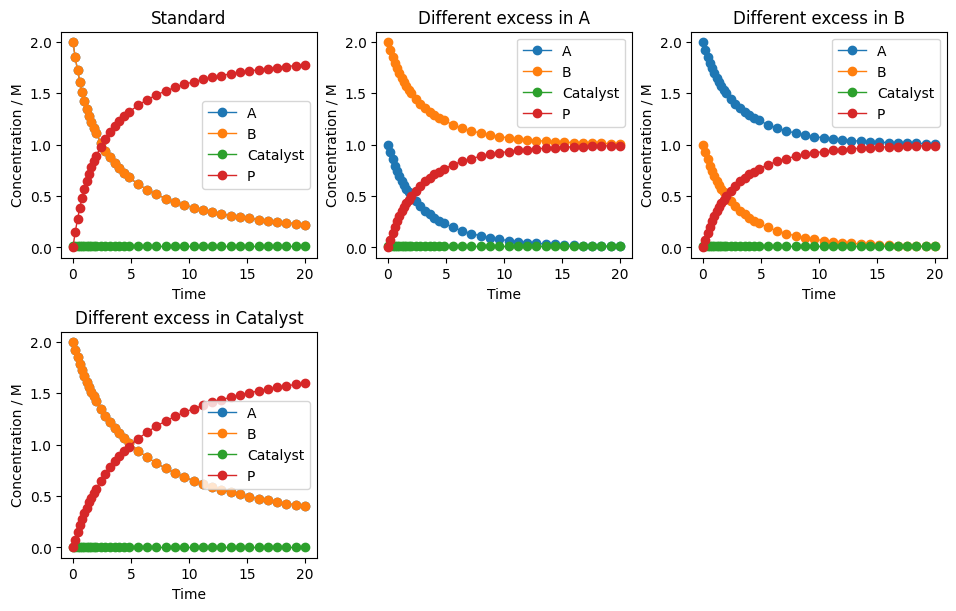

In [40]:
auto_vtna.plot_data(simulated_kinetic_data_2)

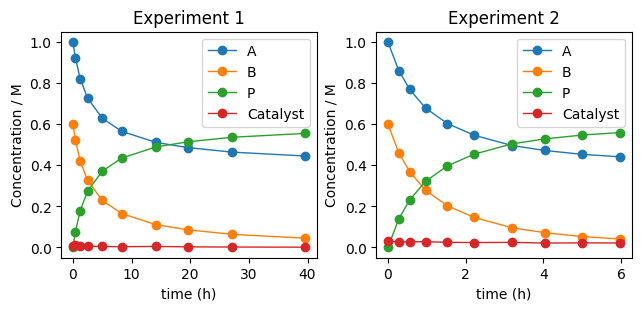

In [41]:
auto_vtna.plot_data(simulated_kinetic_data_1)

To visualise the mass balance in the kinetic data (in particularly relevant if both the concentrations of the reactants and products have been measured directly), the function plot_data_MB() can be called with the kinetic data variable followed by a list of reaction species and a list of their respective stochiometries as inputs. In the following cell, the legend_outside argument is set to true to avoid overly cluttered graphs. 

C:\Users\danie\anaconda3\Lib\site-packages\auto_vtna\__init__.py:732: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


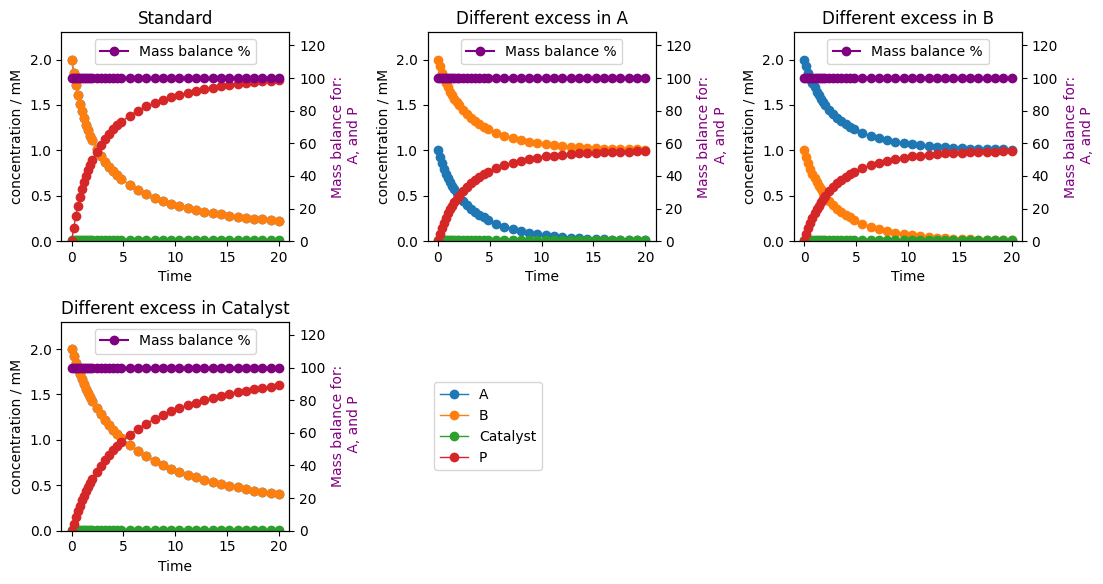

In [42]:
auto_vtna.plot_data_MB(simulated_kinetic_data_2,['A','P'],[1,1], legend_outside=True, fig_size_scaler=1.1)

C:\Users\danie\anaconda3\Lib\site-packages\auto_vtna\__init__.py:726: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(wspace=1.45, hspace=1.45)
C:\Users\danie\anaconda3\Lib\site-packages\auto_vtna\__init__.py:727: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


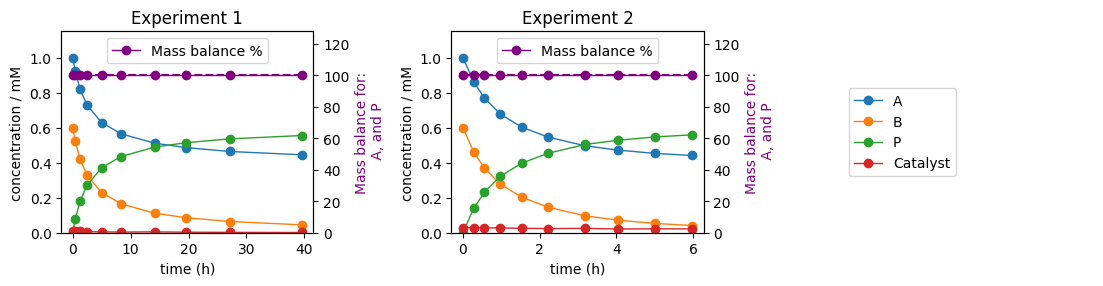

In [9]:
auto_vtna.plot_data_MB(simulated_kinetic_data_1,['A','P'],[1,1], legend_outside=True, fig_size_scaler=1.1)

Alternatively, the concentration profiles of a selected reaction species across all experiments in the dataset can be visualised using plot_data_together

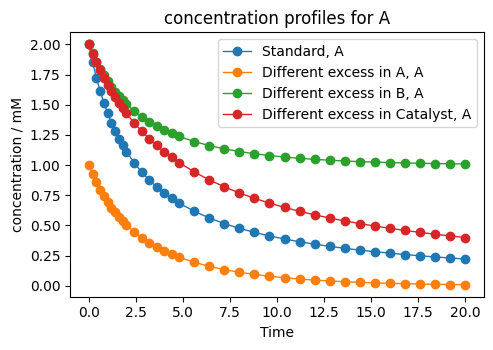

In [43]:
auto_vtna.plot_data_together(simulated_kinetic_data_2,'A',fig_size_scaler=0.8)

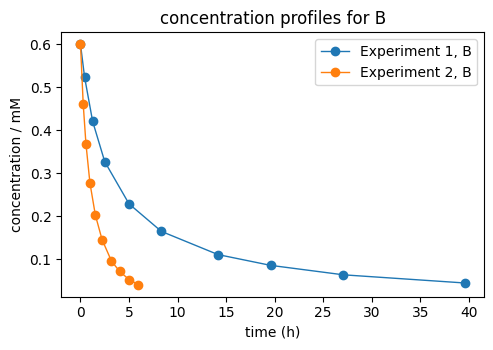

In [32]:
auto_vtna.plot_data_together(simulated_kinetic_data_1,'B',fig_size_scaler=0.8)

## Create a VTNA selection dictionary to set up calculations. 

To carry out conventional VTNA, the user must select which reaction species with which to normalise the time axis, as well as the reaction species whose concentration profiles will define the y-axis in VTNA overlay plots. The user must also specify which experiments to include in the analysis as well as data points or ranges of data points to remove from each reaction progress profile. 

Auto-VTNA takes these inputs via a dictionary named the "VTNA selection dictionary". The VTNA selection dictionary contains a nested dictionary "normalised species" with key:value pairs corresponding to selected reaction species and their suggested order value. The VTNA selection dictionary also contains a key 'output_species' specifying the y-axis reaction species. A nested dictionary 'RM' can also be included to specify which experiments to include in the analysis and a list of the rows which should be removed from the calculation. If the first element of these lists are set to "range", the second two numbers will define a percentage time interval within which all data points will be removed. This can be useful to remove the flat regions of reaction profiles after full conversion has been reached when the concentration profiles are too dense to achieve this conveniently via a row. 

As a starting point, the kinetic data variable can be passed to the make_VTNA_selection() function to return a generic VTNA selection dictionary which can be further modified by the user. 

In [44]:
auto_vtna.make_VTNA_selection(simulated_kinetic_data_1)

{'RM': {'Experiment 1': {'omissions': None},
  'Experiment 2': {'omissions': None}},
 'output_species': 'OS',
 'normalised_species': {'NS': 1}}

In [8]:
selection_data1_1={'RM': {'Experiment 1': {'omissions': None},
  'Experiment 2': {'omissions': None}},
 'output_species': 'P',
 'normalised_species': {'Catalyst': 1}}

In [45]:
auto_vtna.make_VTNA_selection(simulated_kinetic_data_2)

{'RM': {'Standard': {'omissions': None},
  'Different excess in A': {'omissions': None},
  'Different excess in B': {'omissions': None},
  'Different excess in Catalyst': {'omissions': None}},
 'output_species': 'OS',
 'normalised_species': {'NS': 1}}

In [34]:
selection_data2_total={'RM': {'Standard': {'omissions': None},
  'Different excess in A': {'omissions': None},
  'Different excess in B': {'omissions': None},
  'Different excess in Catalyst': {'omissions': None}},
 'output_species': 'P',
 'normalised_species': {'A': 0,'B':0,'cat':0}}

## Normal VTNA

To calculate the normalised time axis for the experiments listed in the VTNA selection dictionary, with the selected normalised reaction species and their associated order values, an instance of the Normal_VTNA class can be generated, taking the kinetic data and VTNA selection dictionary as inputs. 

In [9]:
VTNA_data1_1=Normal_VTNA(simulated_kinetic_data_1,selection_data1_1)

The VTNA overlay plot corresponding to the Normal VTNA calculation can then be visualised by calling the method plot_VTNA(). 

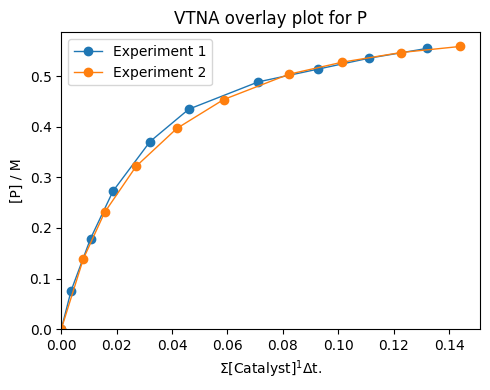

In [10]:
VTNA_data1_1.plot_VTNA()

To also show the total fit polynomial function for a selected degree and constraint, the method plot_VTNA_with_overlay_score() can be called. 

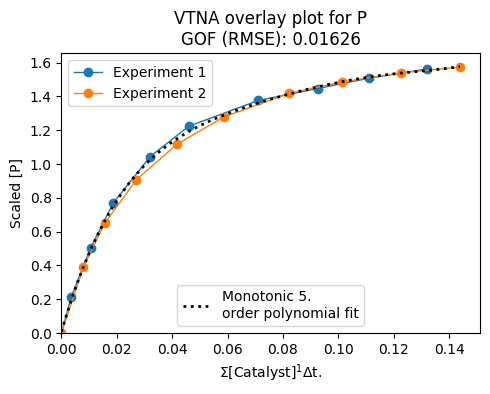

In [11]:
VTNA_data1_1.plot_VTNA_with_overlay_score()

If different orders in Catalyst in the VTNA selection dictionary, different VTNA overlay plots are generated. In this case, an order of 1 in Catalyst seems to give the best concentration profile overlay. 

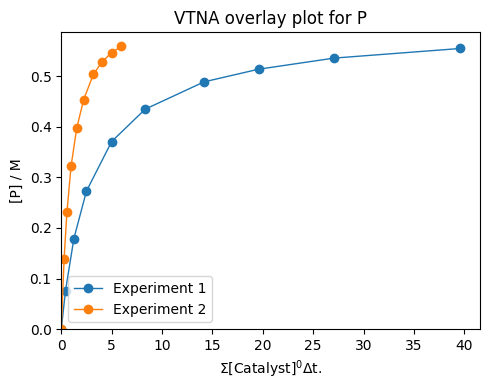

In [12]:
selection_data1_2={'RM': {'Experiment 1': {'omissions': None},
  'Experiment 2': {'omissions': None}},
 'output_species': 'P',
 'normalised_species': {'Catalyst': 0}}
VTNA_data1_2=Normal_VTNA(simulated_kinetic_data_1,selection_data1_2)
VTNA_data1_2.plot_VTNA()

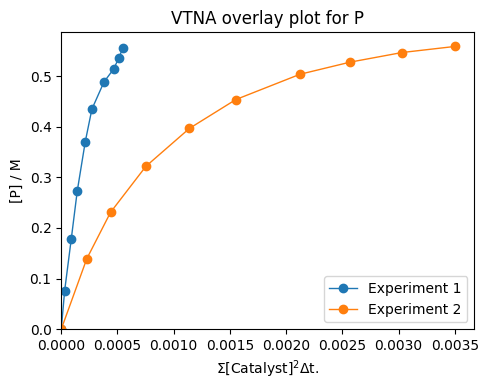

In [13]:
selection_data1_3={'RM': {'Experiment 1': {'omissions': None},
  'Experiment 2': {'omissions': None}},
 'output_species': 'P',
 'normalised_species': {'Catalyst': 2}}
VTNA_data1_2=Normal_VTNA(simulated_kinetic_data_1,selection_data1_3)
VTNA_data1_2.plot_VTNA()

## Automatic VTNA

### Simulated dataset 1

To automatically identify the order value that optimises the overlay score, the class Automatic_VTNA can be utilised. Automatic_VTNA inputs the kinetic data variable and the VTNA selection dictionary specifying which experiments to include, which reaction species to determine the best order(s) for and the output species which defines the y axis. For example, the optimal order in Catalyst from the first kinetic dataset can be determined as shown below. 

In [14]:
data1_automatic_VTNA=Automatic_VTNA(simulated_kinetic_data_1,selection_data1_1)

Auto-VTNA calculation underway.
Best reaction order(s) from the 1st order exploration: (1.1666666666666665,)
Best reaction order(s) from the 2nd order exploration: (0.8999999999999999,)
Best reaction order(s) from the 3rd order exploration: (0.9829629629629628,)
Best reaction order(s) from the 4th order exploration: (0.9663703703703702,)
Best reaction order(s) from the 5th order exploration: (0.9508839506172838,)
Best reaction order(s) from the 6th order exploration: (0.9601758024691356,)
Best reaction order(s) from the 7th order exploration: (0.9572850041152261,)
Best reaction order(s) from the 8th order exploration: (0.9567068444444442,)
The calculation is complete. Time elapsed: 0.6 seconds


In [35]:
data1_automatic_VTNA.best_orders

(0.9572850041152261,)

The results of the automatic VTNA calculation can then be shown by calling the plot_orders_vs_overlay() method. This shows that the calculated order value minimises the RMSE of the total 5th order monotonic polynomial fitting function. Note that the automatic VTNA settings can be modified by the user. For example, the degree of the polynomial fitting function can be altered by specifying the "deg" argument and the fit metric can be changed from RMSE to standard error (SE) or R2.

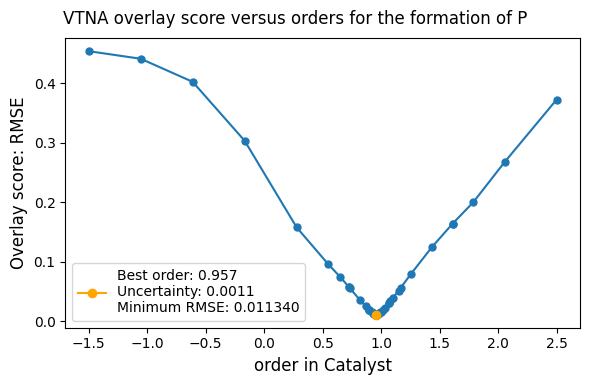

In [15]:
data1_automatic_VTNA.plot_orders_vs_overlay()

Auto-VTNA calculation underway.
Best reaction order(s) from the 1st order exploration: (0.7222222222222223,)
Best reaction order(s) from the 2nd order exploration: (0.9888888888888892,)
Best reaction order(s) from the 3rd order exploration: (0.9888888888888892,)
Best reaction order(s) from the 4th order exploration: (0.9391111111111113,)
Best reaction order(s) from the 5th order exploration: (0.9545975308641977,)
Best reaction order(s) from the 6th order exploration: (0.957694814814815,)
Best reaction order(s) from the 7th order exploration: (0.9548040164609055,)
Best reaction order(s) from the 8th order exploration: (0.9553821761316874,)
The calculation is complete. Time elapsed: 0.9 seconds


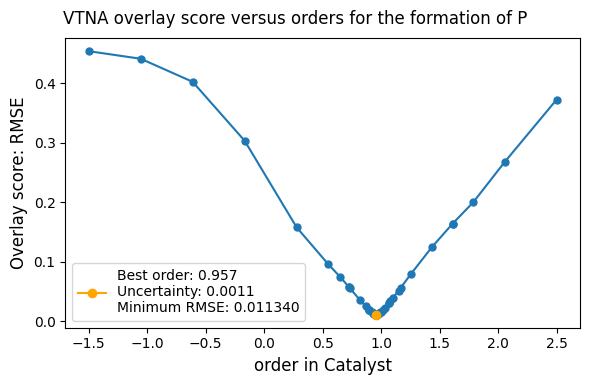

In [37]:
data1_automatic_VTNA_2=Automatic_VTNA(simulated_kinetic_data_1,selection_data1_1,fit_metric='R2',deg=7)

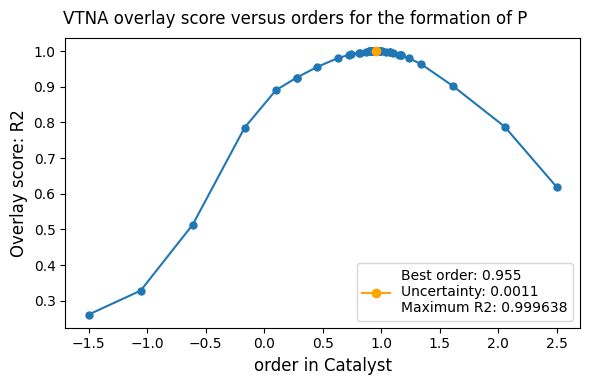

In [38]:
data1_automatic_VTNA_2.plot_orders_vs_overlay()

### Simulated dataset 2

For the second simulated kinetic dataset, 3 different excess experiments in A, B and catalyst are included as well as a standard experiment. The initial concentrations in this dataset can be shown by using the initial_concs() function. 

In [46]:
auto_vtna.initial_concs(simulated_kinetic_data_2)

,Reaction species,Standard init. conc.,Different excess in A init. conc.,Different excess in B init. conc.,Different excess in Catalyst init. conc.
0,A,2.00,1.00,2.00,2.000
1,B,2.00,2.00,1.00,2.000
2,Catalyst,0.01,0.01,0.01,0.005
3,P,0.00,0.00,0.00,0.000


Automatic VTNA can be used to calculate the best order in A, B and Catalyst separately by selecting the standard and relevant different excess experiments in a VTNA selection dictionary. The results of the calculation can be visualised by calling the plot_orders_vs_overlay() method on the calculation objects. 

Auto-VTNA calculation underway.
Best reaction order(s) from the 1st order exploration: (1.1666666666666665,)
Best reaction order(s) from the 2nd order exploration: (1.0777777777777777,)
Best reaction order(s) from the 3rd order exploration: (0.9948148148148148,)
Best reaction order(s) from the 4th order exploration: (1.0114074074074073,)
Best reaction order(s) from the 5th order exploration: (0.9959209876543208,)
Best reaction order(s) from the 6th order exploration: (0.9990182716049382,)
Best reaction order(s) from the 7th order exploration: (1.0019090699588475,)
Best reaction order(s) from the 8th order exploration: (1.0001745909465019,)
The calculation is complete. Time elapsed: 0.7 seconds


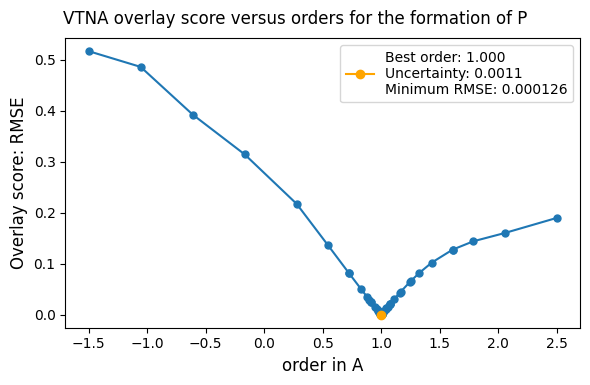

In [18]:
selection_data2_A={'RM': {'Standard': {'omissions': None},
  'Different excess in A': {'omissions': None}},
 'output_species': 'P',
 'normalised_species': {'A': 0}}
data2_automatic_VTNA_A=Automatic_VTNA(simulated_kinetic_data_2,selection_data2_A)
data2_automatic_VTNA_A.plot_orders_vs_overlay()

Auto-VTNA calculation underway.
Best reaction order(s) from the 1st order exploration: (1.1666666666666665,)
Best reaction order(s) from the 2nd order exploration: (1.0777777777777777,)
Best reaction order(s) from the 3rd order exploration: (0.9948148148148148,)
Best reaction order(s) from the 4th order exploration: (1.0114074074074073,)
Best reaction order(s) from the 5th order exploration: (0.9959209876543208,)
Best reaction order(s) from the 6th order exploration: (0.9990182716049382,)
Best reaction order(s) from the 7th order exploration: (1.0019090699588475,)
Best reaction order(s) from the 8th order exploration: (1.0001745909465019,)
The calculation is complete. Time elapsed: 0.6 seconds


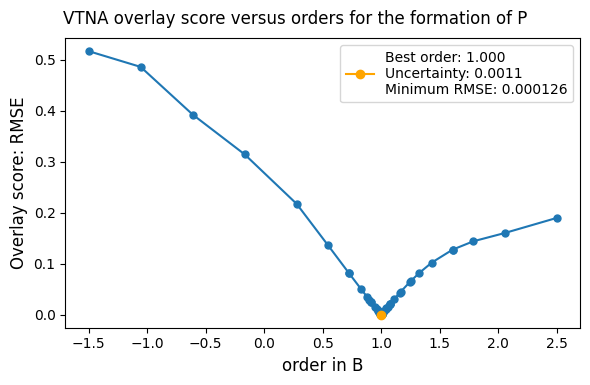

In [19]:
selection_data2_B={'RM': {'Standard': {'omissions': None},
  'Different excess in B': {'omissions': None}},
 'output_species': 'P',
 'normalised_species': {'B': 0}}
data2_automatic_VTNA_B=Automatic_VTNA(simulated_kinetic_data_2,selection_data2_B)
data2_automatic_VTNA_B.plot_orders_vs_overlay()

Auto-VTNA calculation underway.
Best reaction order(s) from the 1st order exploration: (1.1666666666666665,)
Best reaction order(s) from the 2nd order exploration: (0.8999999999999999,)
Best reaction order(s) from the 3rd order exploration: (0.9829629629629628,)
Best reaction order(s) from the 4th order exploration: (0.9663703703703702,)
Best reaction order(s) from the 5th order exploration: (0.9663703703703702,)
Best reaction order(s) from the 6th order exploration: (0.9694676543209875,)
Best reaction order(s) from the 7th order exploration: (0.9694676543209875,)
Best reaction order(s) from the 8th order exploration: (0.9700458139917694,)
The calculation is complete. Time elapsed: 0.8 seconds


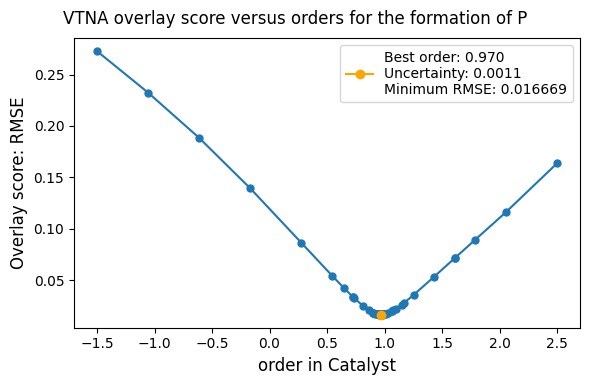

In [47]:
selection_data2_Catalyst={'RM': {'Standard': {'omissions': None},
  'Different excess in Catalyst': {'omissions': None}},
 'output_species': 'P',
 'normalised_species': {'Catalyst': 0}}
data2_automatic_VTNA_Catalyst=Automatic_VTNA(simulated_kinetic_data_2,selection_data2_Catalyst)
data2_automatic_VTNA_Catalyst.plot_orders_vs_overlay()

The uncertainty in a calculated order value can be gauged by identifying the range of order values for each normalised reaction species found among the order value combinations a given percentage away from the optimum point. These overlay score intervals are provided in the calculation (based on the score_interval argument), but can also be obtained via a method in the Automatic_VTNA class known as "identify_error_intervals". 

In [48]:
data2_automatic_VTNA_Catalyst.interval

,Normalised species,Lower order limit 15.0%,Upper order limit 15.0%
0,Catalyst,0.9,1.032741


In [49]:
data2_automatic_VTNA_Catalyst.identify_error_intervals(score_interval=0.15)

,Normalised species,Lower order limit 15.0%,Upper order limit 15.0%
0,Catalyst,0.9,1.032741


In [50]:
data2_automatic_VTNA_Catalyst.identify_error_intervals(score_interval=0.5)

,Normalised species,Lower order limit 50.0%,Upper order limit 50.0%
0,Catalyst,0.817037,1.099111


The overlay score error intervals can also be visualised as a horizontal line in overlay score versus order plots:

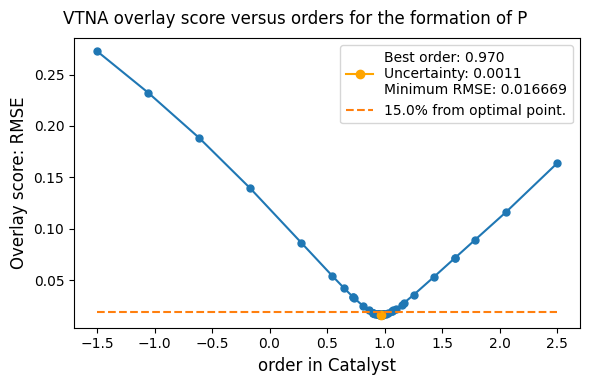

In [51]:
data2_automatic_VTNA_Catalyst.plot_orders_vs_overlay(interval=True)

### Automatic total VTNA on simulated dataset 2

The orders in A, B and Catalyst can also be determined in a single calculation using a VTNA selection dictionary with both A, B and cat defined as normalised reaction species. This can be considered automatic total VTNA and is discussed in depth in the Auto-VTNA pre-print. Note that the results from the calculation cannot be visualised as there are 3 normalised species involved. 

In [25]:
data2_automatic_VTNA_total=Automatic_VTNA(simulated_kinetic_data_2,selection_data2_total)
data2_automatic_VTNA_total.plot_orders_vs_overlay()

Auto-VTNA calculation underway.
Best reaction order(s) from the 1st order exploration: (1.1666666666666665, 1.1666666666666665, 1.1666666666666665)
Best reaction order(s) from the 2nd order exploration: (1.0777777777777777, 1.0777777777777777, 1.0777777777777777)
Best reaction order(s) from the 3rd order exploration: (0.9948148148148148, 0.9948148148148148, 0.9948148148148148)
Best reaction order(s) from the 4th order exploration: (1.0114074074074073, 1.0114074074074073, 1.0114074074074073)
Best reaction order(s) from the 5th order exploration: (0.9959209876543208, 0.9959209876543208, 0.9959209876543208)
Best reaction order(s) from the 6th order exploration: (0.9990182716049382, 0.9990182716049382, 0.9990182716049382)
Best reaction order(s) from the 7th order exploration: (0.9990182716049382, 0.9990182716049382, 0.9990182716049382)
Best reaction order(s) from the 8th order exploration: (1.0007527506172837, 1.0007527506172837, 0.99959643127572)
The calculation is complete. Time elapsed:

ValueError('The overlay score : order value matrix can only be visualized for 1 or 2 varying normalised reaction species.')

To verify that the calculated orders of 1 in A, B and Catalyst give concentration profile overlay, the Normal_VTNA class can be used. 

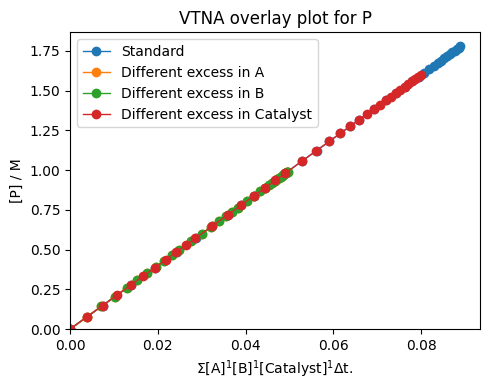

In [52]:
selection_data2_total_best_orders={'RM': {'Standard': {'omissions': None},
  'Different excess in A': {'omissions': None},
  'Different excess in B': {'omissions': None},
  'Different excess in Catalyst': {'omissions': None}},
 'output_species': 'P',
 'normalised_species': {'A': 1,'B':1,'Catalyst':1}}
VTNA_data2_total=Normal_VTNA(simulated_kinetic_data_2,selection_data2_total_best_orders)
VTNA_data2_total.plot_VTNA()

If desired, the calculation can be further sped up by lowering the resolution parameter to 5. This requires a larger number of iterations to achieve a dense mesh of order values around the optimum point. The constraint can also be set to "None" which gives ordinary rather than monotonic polynomial fitting. This is particularly important if the best order of more than 3 normalised reaction species is calculated (processing time scales with resolution^no(normalised species)). Please refer to section 5 of the ESI of the Auto-VTNA pre-print for more information on what determines the processing time of the automatic VTNA algorithm. 

In [27]:
data2_automatic_VTNA_total_2=Automatic_VTNA(simulated_kinetic_data_2,selection_data2_total,constraint=None,resolution=5,iterations=10)

Auto-VTNA calculation underway.
Best reaction order(s) from the 1st order exploration: (0.7857142857142856, 0.7857142857142856, 0.7857142857142856)
Best reaction order(s) from the 2nd order exploration: (0.9228571428571425, 0.9228571428571425, 0.9228571428571425)
Best reaction order(s) from the 3rd order exploration: (0.9228571428571425, 0.9228571428571425, 0.9228571428571425)
Best reaction order(s) from the 4th order exploration: (0.9689371428571425, 0.9689371428571425, 0.9689371428571425)
Best reaction order(s) from the 5th order exploration: (1.0242331428571425, 1.0242331428571425, 1.0242331428571425)
Best reaction order(s) from the 6th order exploration: (1.0087502628571425, 1.0087502628571425, 1.0087502628571425)
Best reaction order(s) from the 7th order exploration: (1.0087502628571425, 1.0087502628571425, 1.0087502628571425)
Best reaction order(s) from the 8th order exploration: (1.0035480151771425, 1.0035480151771425, 1.0035480151771425)
Best reaction order(s) from the 9th orde

The Automatic_VTNA class allows the user to define a list of "fixed_order_species", which should be selected from the normalised species of the VTNA selection dictionary. For example, the total VTNA calculation to derive the orders in A, B and Catalyst that maximise concentration profile overlay can be performed with a fixed catalyst order of 1. This lowers the dimensionality of the overlay score versus order matrix such that the correlation between overlay score and the orders in A and B can be visualised via a contour plot. 

Auto-VTNA calculation underway.
Best reaction order(s) from the 1st order exploration: (1.1666666666666665, 1.1666666666666665)
Best reaction order(s) from the 2nd order exploration: (1.0777777777777777, 1.0777777777777777)
Best reaction order(s) from the 3rd order exploration: (0.9948148148148148, 0.9948148148148148)
Best reaction order(s) from the 4th order exploration: (1.0114074074074073, 1.0114074074074073)
Best reaction order(s) from the 5th order exploration: (0.9959209876543208, 0.9959209876543208)
Best reaction order(s) from the 6th order exploration: (0.9990182716049382, 0.9990182716049382)
Best reaction order(s) from the 7th order exploration: (0.9990182716049382, 0.9990182716049382)
Best reaction order(s) from the 8th order exploration: (1.0007527506172837, 1.0007527506172837)
The calculation is complete. Time elapsed: 5.9 seconds


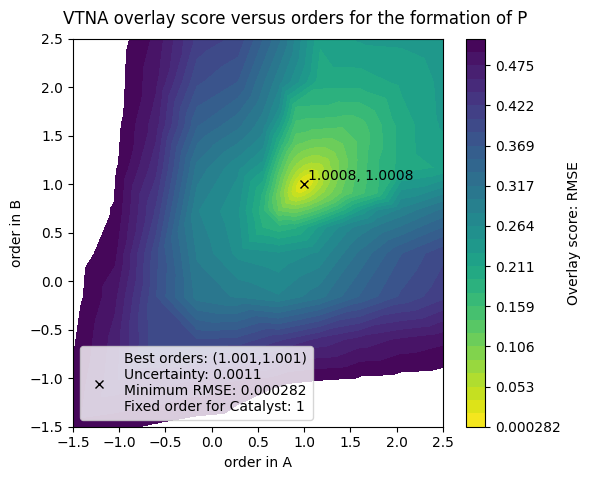

In [54]:
data2_automatic_VTNA_total_fixed_order_Catalyst=Automatic_VTNA(simulated_kinetic_data_2,selection_data2_total_best_orders,fixed_order_species='Catalyst')
data2_automatic_VTNA_total_fixed_order_Catalyst.plot_orders_vs_overlay()

By applying the magic command %matplotlib qt, an interactive overlay plot is generated which can be clicked on to show the VTNA overlay plot at any given set of order values. Right clicks also show the relevant fitting function of the calculation and the resulting overlay score value. 

In [29]:
%matplotlib qt
data2_automatic_VTNA_total_fixed_order_cat.plot_orders_vs_overlay()

Both the data visualisation functions and the Normal and Automatic VTNA classes have many different keyword arguments which can be altered by the user. More details on these are provided in the .py files of the package which can be downloaded from Github. Easier access to these various arguments with more user-friendly drop-down menus are also provided in a graphical user interface (GUI) named Automatic VTNA Calculator which can be downloaded from this link: https://drive.google.com/file/d/1p6gPdmGTt2o32ueVD2Jnts269cob1koo/view?usp=sharing. For more information on using the Python package and associated graphical user interface, consult the ESI of the Auto-VTNA pre-print sections 7 and 8. In general, it is recommended to access the features of Auto-VTNA via the GUI as it makes the features of Auto-VTNA more accessible. If you have questions, discoved any bugs or have ideas for the improvement of the Auto-VTNA package or GUI, please get in contact on GitHub or via email: dd4518@ic.ac.uk. 